In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# font = {'family' : 'SimSun',
# 'weight': 'bold',
# 'size'  : '14'}
# plt.rc('font', **font)        # 步驟一（設定字型的更多屬性）
# plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）
sns.set(font="SimSun", font_scale=1.5)
# x1 = [1,2,3,4,5]

In [19]:
df = pd.read_csv("new_data.csv")
cols = ['總體滿意度','信用卡消費頻率','消費額度','人潮數量','信用卡紅利累積','同儕使用多寡','使用電子支付頻率']
df.drop('在「能使用」電子支付的場合，使用電子支付之頻率_低頻', axis=1, inplace=True)
df.columns = cols
df

,總體滿意度,信用卡消費頻率,消費額度,人潮數量,信用卡紅利累積,同儕使用多寡,使用電子支付頻率
0,0.138533,5,1,2,2,3,1
1,2.082478,2,1,2,4,2,1
2,-1.130548,1,1,1,5,3,0
3,1.785923,1,1,1,1,1,1
4,1.696866,1,1,5,1,1,1
...,...,...,...,...,...,...,...
168,1.956195,3,1,1,2,3,1
169,-2.774274,2,4,3,4,2,1
170,-2.249039,1,1,1,5,3,1
171,0.209903,3,1,2,5,5,1


(array([0., 2., 4., 6.]), <a list of 0 Text yticklabel objects>)

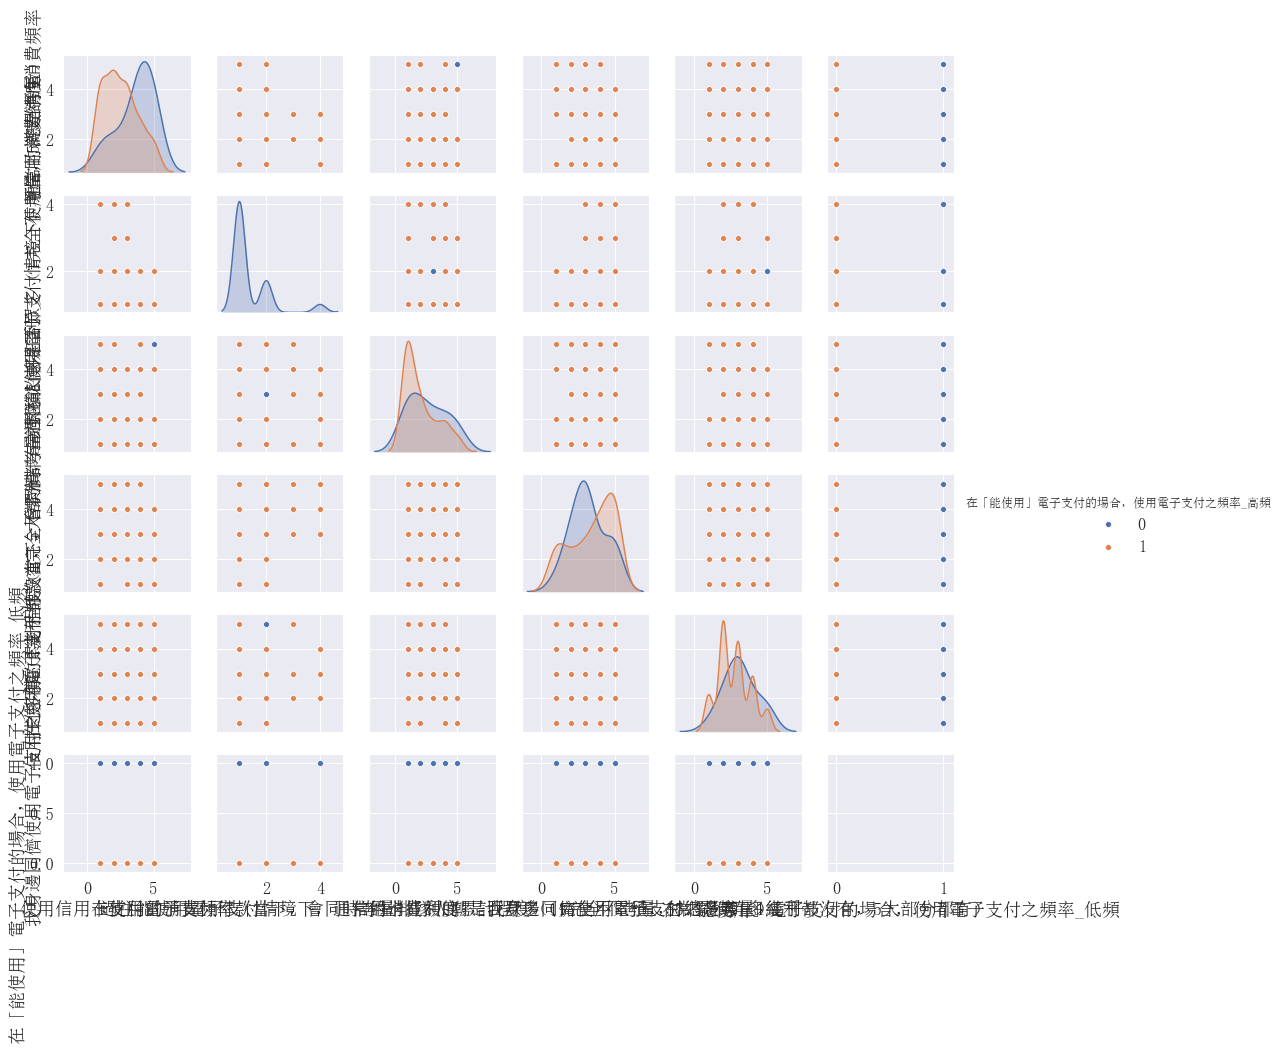

In [5]:
sns.pairplot(df2, hue="使用電子支付頻率")
plt.xticks(rotation=90)
plt.yticks(rotation=90)

In [46]:
lowf_mean = format(df[df['使用電子支付頻率'] == 0]["總體滿意度"].mean(), 'f')
highf_mean = format(df[df['使用電子支付頻率'] == 1]["總體滿意度"].mean(), 'f')

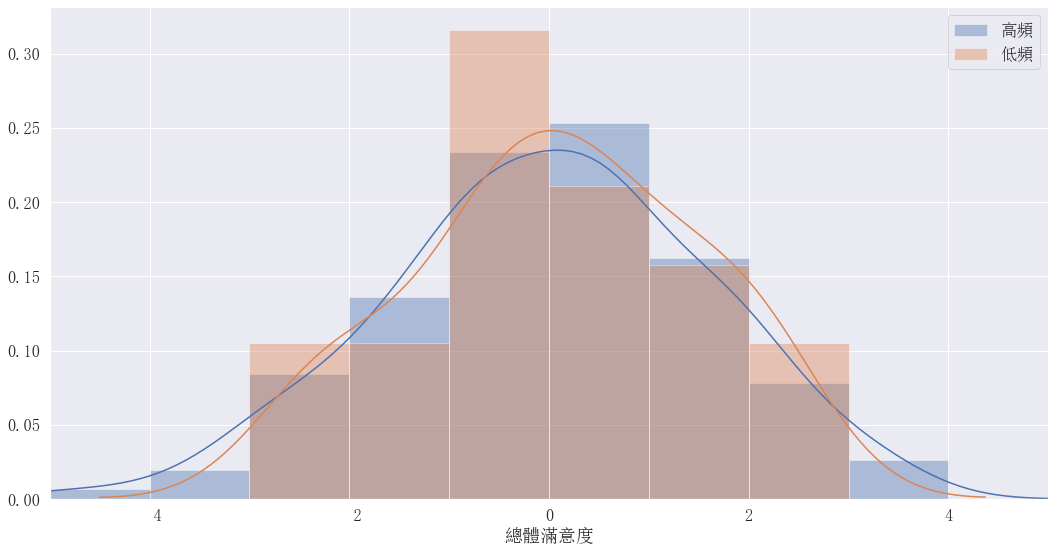

In [56]:
    bins=range(-5,5,1)
    plt.figure(figsize=(15,8))
    ax = sns.distplot(df.iloc[:,0][df["使用電子支付頻率"] == 1], bins=bins, kde=True)
    sns.distplot(df.iloc[:,0][df["使用電子支付頻率"] == 0], bins=bins, kde=True)
    plt.legend(['高頻', '低頻'])
    # ax.set(xlabel=df.columns[0])
    # plt.axvline(x=lowf_mean , ls='-.', lw=2)
    # plt.axvline(x=highf_mean , ls='-', lw=2)
    plt.xlim(-5,5)
    plt.tight_layout()
    plt.show()

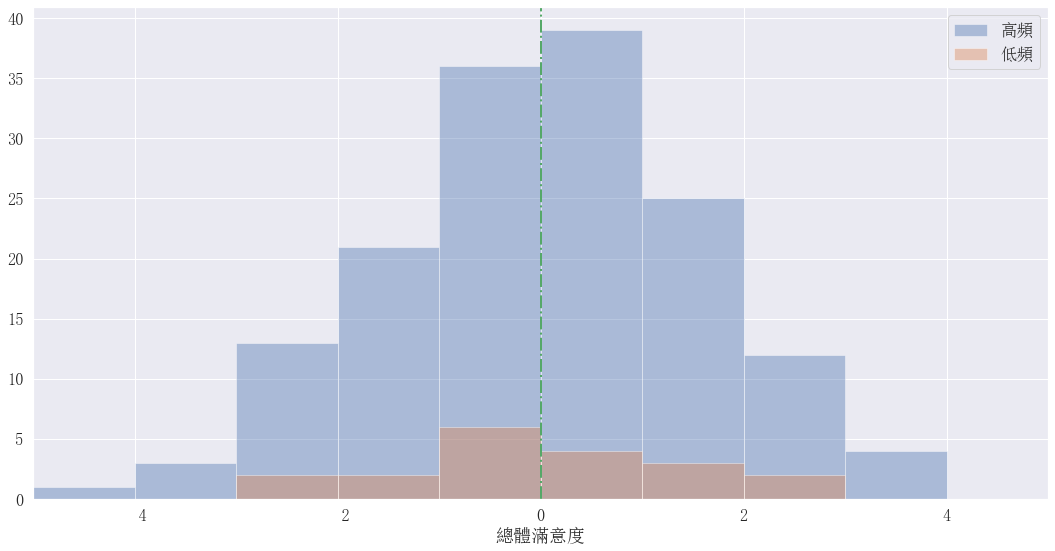

In [24]:
    bins=range(-5,5,1)
    plt.figure(figsize=(15,8))
    ax = sns.distplot(df.iloc[:,0][df["使用電子支付頻率"] == 1], bins=bins, kde=False)
    sns.distplot(df.iloc[:,0][df["使用電子支付頻率"] == 0], bins=bins, kde=False)
    plt.legend(['高頻', '低頻'])
    
    # plt.title('Density Plot of Age for Surviving Population and Deceased Population')
    # ax.set(xlabel=df.columns[0])
    plt.axvline(x=0, c='g', ls='-.', lw=2)
    plt.xlim(-5,5)
    plt.tight_layout()
    plt.show()

In [8]:
df.loc[df["總體滿意度"] < 0,"總體滿意度"] = "高"
df.loc[df['總體滿意度'] != "高", '總體滿意度'] = '低'
df

,總體滿意度,使用信用卡支付的消費頻率,過往能使用電子支付情境下，通常的消費額度,在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）,信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）,我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）,在「能使用」電子支付的場合，使用電子支付之頻率_低頻,在「能使用」電子支付的場合，使用電子支付之頻率_高頻
0,低,5,1,2,2,3,0,1
1,低,2,1,2,4,2,0,1
2,高,1,1,1,5,3,1,0
3,低,1,1,1,1,1,0,1
4,低,1,1,5,1,1,0,1
...,...,...,...,...,...,...,...,...
168,低,3,1,1,2,3,0,1
169,高,2,4,3,4,2,0,1
170,高,1,1,1,5,3,0,1
171,低,3,1,2,5,5,0,1


In [9]:
df.loc[df["在「能使用」電子支付的場合，使用電子支付之頻率_高頻"] == 1].count()

總體滿意度                                      154
使用信用卡支付的消費頻率                               154
過往能使用電子支付情境下，通常的消費額度                       154
在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）    154
信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）                154
我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）              154
在「能使用」電子支付的場合，使用電子支付之頻率_低頻                 154
在「能使用」電子支付的場合，使用電子支付之頻率_高頻                 154
dtype: int64

In [10]:
df.groupby(["使用信用卡支付的消費頻率","在「能使用」電子支付的場合，使用電子支付之頻率_高頻"]).count()

總體滿意度  過往能使用電子支付情境下，通常的消費額度  \
使用信用卡支付的消費頻率 在「能使用」電子支付的場合，使用電子支付之頻率_高頻                                
1            0                               2                     2   
             1                              40                    40   
2            0                               2                     2   
             1                              42                    42   
3            0                               2                     2   
             1                              37                    37   
4            0                               7                     7   
             1                              21                    21   
5            0                               6                     6   
             1                              14                    14   

                                         在使用電子支付付款當下，會同時考量排隊人潮是否眾多（1完全不考量，5總是考量）  \
使用信用卡支付的消費頻率 在「能使用」電子支付的場合，使用電子支付之頻率_高頻                                            
1            0                                                                 2   
             1                                                                40   
2            0                                                                 2   
             1                                                                42   
3            0                                                                 2   
             1                                                                37   
4            0                                                                 7   
             1                                                                21   
5            0                                                                 6   
             1                                                                14   

                                         信用卡紅利的累計程度（1完全不累積，5常累積許多紅利）  \
使用信用卡支付的消費頻率 在「能使用」電子支付的場合，使用電子支付之頻率_高頻                                
1            0                                                     2   
             1                                                    40   
2            0                                                     2   
             1                                                    42   
3            0                                                     2   
             1                                                    37   
4            0                                                     7   
             1                                                    21   
5            0                                                     6   
             1                                                    14   

                                         我身邊同儕使用電子支付之多寡（1幾乎都沒有，5大部分都有）  \
使用信用卡支付的消費頻率 在「能使用」電子支付的場合，使用電子支付之頻率_高頻                                  
1            0                                                       2   
             1                                                      40   
2            0                                                       2   
             1                                                      42   
3            0                                                       2   
             1                                                      37   
4            0                                                       7   
             1                                                      21   
5            0                                                       6   
             1                                                      14   

                                         在「能使用」電子支付的場合，使用電子支付之頻率_低頻  
使用信用卡支付的消費頻率 在「能使用」電子支付的場合，使用電子支付之頻率_高頻                              
1            0                                                    2  
             1                                                   40  
2            0                                                    2  
             1                                                 

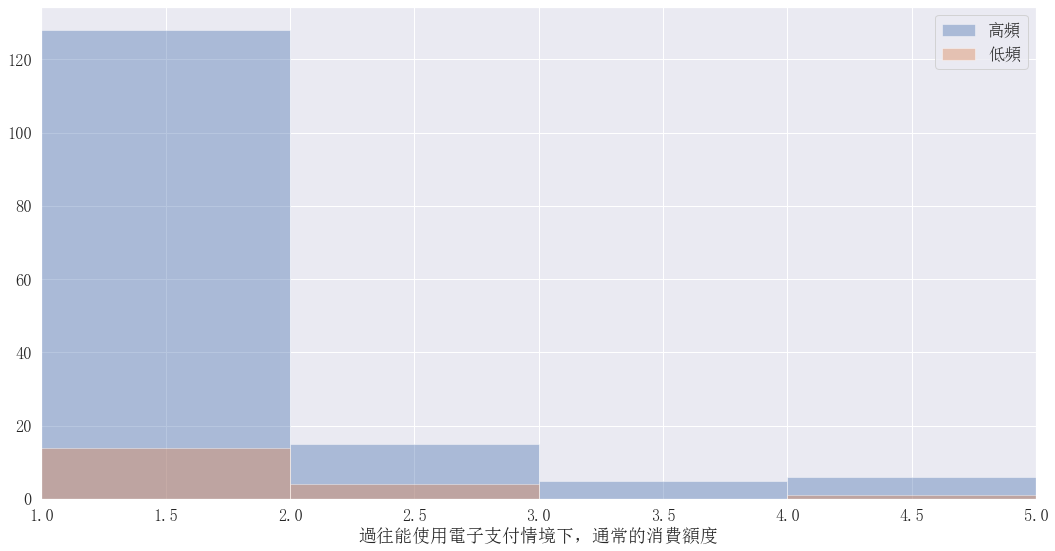

In [11]:
bins = range(6)
plt.figure(figsize=(15,8))
ax1 = sns.distplot(df.iloc[:,2][df["在「能使用」電子支付的場合，使用電子支付之頻率_高頻"] == 1], bins=bins,kde=False)
ax2 = sns.distplot(df.iloc[:,2][df["在「能使用」電子支付的場合，使用電子支付之頻率_高頻"] == 0], bins=bins,kde=False)
plt.legend(['高頻', '低頻'])
plt.xticks()
plt.xlim(1,5)
plt.tight_layout()
plt.show()

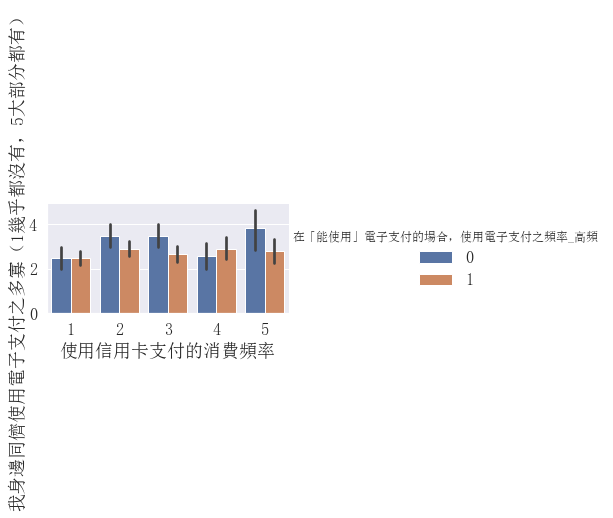

In [12]:
sns.catplot(x=cols[1], y=cols[5], kind="bar",hue="在「能使用」電子支付的場合，使用電子支付之頻率_高頻", data=df)

<Figure size 576x432 with 0 Axes>

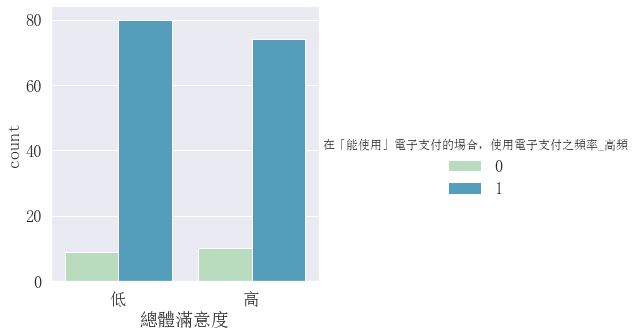

<Figure size 576x432 with 0 Axes>

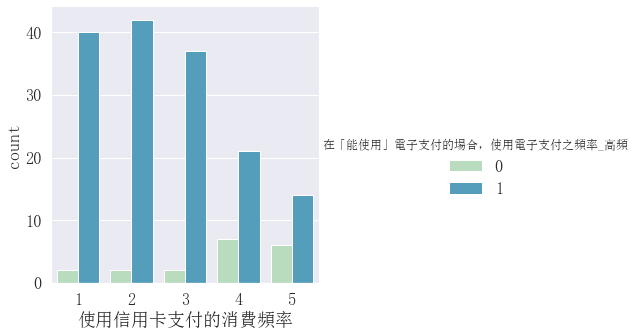

<Figure size 576x432 with 0 Axes>

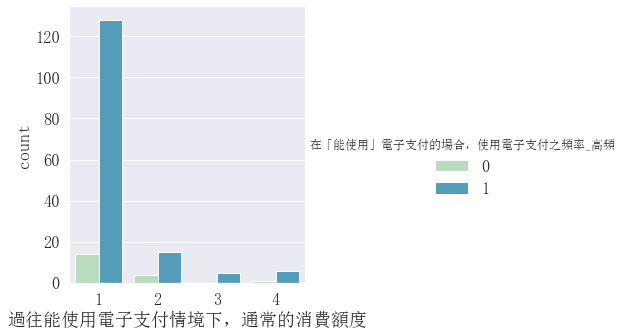

<Figure size 576x432 with 0 Axes>

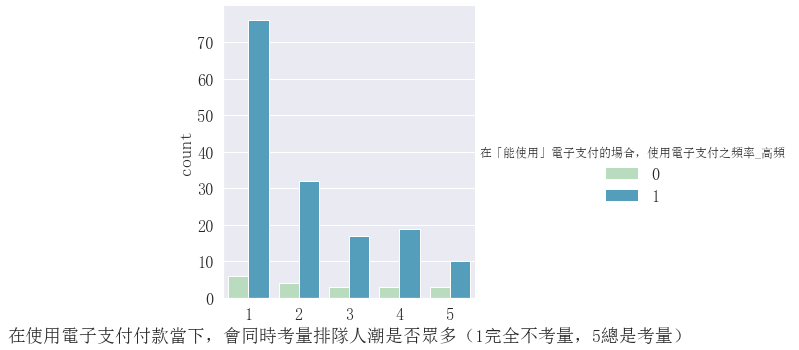

<Figure size 576x432 with 0 Axes>

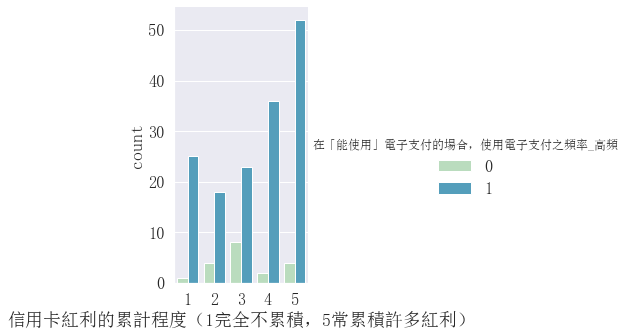

<Figure size 576x432 with 0 Axes>

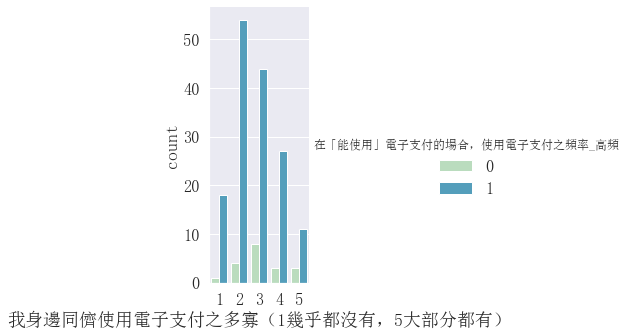

In [13]:
for i in range (6):
    plt.figure(figsize=(8,6))
    sns.catplot(x=cols[i], kind="count", palette="GnBu", hue="在「能使用」電子支付的場合，使用電子支付之頻率_高頻", data=df)

In [14]:
len(cols)

8